In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from vc_sample.density_estimation import KernelDensityEstimator, Kernel, epanechnikov, kernel_scale_factor
from vc_sample.void_and_cluster import VoidAndCluster

In [24]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
xs = np.linspace(0.0, 10.0, 100)
points = xs.reshape(-1, 1)

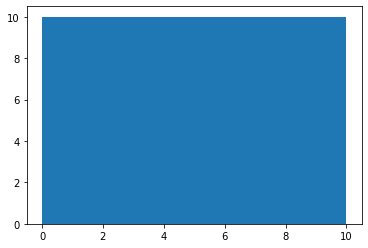

In [26]:
plt.hist(xs);

In [43]:
num_samples = 30

kernel_scale1d = 0.3 * kernel_scale_factor(dimensionality=1, num_points=100, num_samples=num_samples)
kernel_scale1d

1.0

In [44]:
density_estimator = KernelDensityEstimator(points, Kernel(epanechnikov, scale=kernel_scale1d))
vc = VoidAndCluster(points, density_estimator, num_initial_samples=10)

samples = vc.sample(size=num_samples)

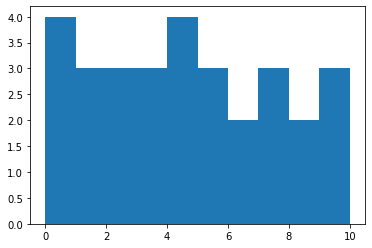

In [45]:
plt.hist(samples);

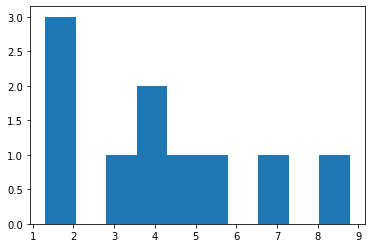

In [46]:
random_samples = np.random.choice(xs, replace=False, size=10)

plt.hist(random_samples);

## 2D

In [47]:
x_ = np.linspace(0., 1., 20)
y_ = np.linspace(0., 1., 20)

x, y = np.meshgrid(x_, y_, indexing='ij')
points = np.stack([x.flatten(), y.flatten()]).T

In [48]:
kernel_bandwidth = 0.05 * kernel_scale_factor(dimensionality=2, num_points=20**2, num_samples=100)
kernel_bandwidth

0.1

In [49]:
density_estimator = KernelDensityEstimator(points, Kernel(epanechnikov, scale=kernel_bandwidth))
vc = VoidAndCluster(points, density_estimator, num_initial_samples=10)

samples = vc.sample(size=100)

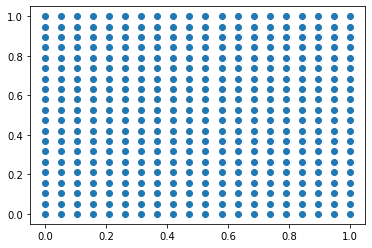

In [50]:
plt.scatter(x=points[:,0], y=points[:,1]);

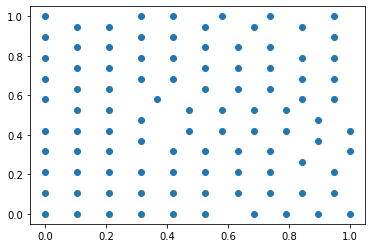

In [51]:
plt.scatter(x=samples[:,0], y=samples[:,1]);